## Section 2. Data Understanding
### 2.1 Dataset Information

In [1]:
import os
import warnings
from pathlib import Path

# Suppress all warnings
warnings.filterwarnings("ignore")

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Statistics
from scipy.stats import spearmanr, normaltest, mannwhitneyu, kruskal

# Pandas display settings
pd.set_option("display.max_columns", None)

# Seaborn aesthetics
sns.set_theme()

# File path
data_path = Path("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Load dataset
if data_path.exists():
    real_df = pd.read_csv(data_path)
    df = real_df.copy()
    print(df.info())
    display(df.head())
else:
    print(f"File not found: {data_path}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Berikut adalah penjelasan untuk masing-masing kolom:

<table>
    <thead>
        <tr>
            <th>Kolom</th>
            <th>Definisi</th>
            <th>Value dan Penjelasan</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>customerID</b></td>
            <td>ID unik untuk setiap pelanggan.</td>
            <td><code>Teks alfanumerik</code>: Kode unik pengenal pelanggan.</td>
        </tr>
        <tr>
            <td><b>gender</b></td>
            <td>Jenis kelamin pelanggan.</td>
            <td><code>Male</code>: Laki-laki.<br><code>Female</code>: Perempuan.</td>
        </tr>
        <tr>
            <td><b>SeniorCitizen</b></td>
            <td>Bagaimanakah pelanggan seorang warga senior.</td>
            <td><code>1</code>: Ya, warga senior.<br><code>0</code>: Bukan warga senior.</td>
        </tr>
        <tr>
            <td><b>Partner</b></td>
            <td>Bagaimanakah pelanggan memiliki pasangan.</td>
            <td><code>Yes</code>: Punya pasangan.<br><code>No</code>: Tidak punya pasangan.</td>
        </tr>
        <tr>
            <td><b>Dependents</b></td>
            <td>Bagaimanakah pelanggan memiliki tanggungan.</td>
            <td><code>Yes</code>: Punya tanggungan.<br><code>No</code>: Tidak punya tanggungan.</td>
        </tr>
        <tr>
            <td><b>tenure</b></td>
            <td>Lama berlangganan dalam bulan.</td>
            <td><code>Numerik</code>: Jumlah bulan pelanggan bersama perusahaan.</td>
        </tr>
        <tr>
            <td><b>Contract</b></td>
            <td>Jenis kontrak berlangganan.</td>
            <td><code>Month-to-month</code>: Kontrak bulanan.<br><code>One year</code>: Kontrak satu tahun.<br><code>Two year</code>: Kontrak dua tahun.</td>
        </tr>
        <tr>
            <td><b>PaperlessBilling</b></td>
            <td>Menggunakan tagihan elektronik.</td>
            <td><code>Yes</code>: Tagihan via email.<br><code>No</code>: Tagihan fisik.</td>
        </tr>
        <tr>
            <td><b>PaymentMethod</b></td>
            <td>Metode pembayaran yang digunakan.</td>
            <td><code>Electronic check</code>: Pembayaran dengan cek elektronik.<br><code>Mailed check</code>: Pembayaran dengan mengirimkan cek fisik.<br><code>Bank transfer (automatic)</code>: Pembayaran melalui transfer bank otomatis.<br><code>Credit card (automatic)</code>: Pembayaran melalui kartu kredit otomatis.</td>
        </tr>
        <tr>
            <td><b>MonthlyCharges</b></td>
            <td>Tagihan setiap bulan.</td>
            <td><code>Numerik Desimal</code>: Total biaya bulanan untuk semua layanan.</td>
        </tr>
        <tr>
            <td><b>TotalCharges</b></td>
            <td>Total tagihan selama berlangganan.</td>
            <td><code>Numerik Desimal</code>: Akumulasi semua tagihan bulanan.</td>
        </tr>
        <tr>
            <td><b>PhoneService</b></td>
            <td>Bagaimanakah pelanggan punya layanan telepon.</td>
            <td><code>Yes</code>: Punya layanan telepon.<br><code>No</code>: Tidak punya.</td>
        </tr>
        <tr>
            <td><b>MultipleLines</b></td>
            <td>Bagaimanakah punya lebih dari satu saluran telepon.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Punya telepon, tapi hanya 1 saluran.<br><code>No phone service</code>: Tidak punya layanan telepon.</td>
        </tr>
        <tr>
            <td><b>InternetService</b></td>
            <td>Tipe layanan internet pelanggan.</td>
            <td><code>DSL</code>: Layanan internet melalui jalur telepon standar.<br><code>Fiber optic</code>: Layanan internet berkecepatan tinggi melalui kabel fiber optik.<br><code>No</code>: Tidak berlangganan internet.</td>
        </tr>
        <tr>
            <td><b>OnlineSecurity</b></td>
            <td>Bagaimanakah punya layanan keamanan online.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>OnlineBackup</b></td>
            <td>Bagaimanakah punya layanan backup online.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>DeviceProtection</b></td>
            <td>Bagaimanakah punya proteksi perangkat.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>TechSupport</b></td>
            <td>Bagaimanakah punya dukungan teknis premium.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>StreamingTV</b></td>
            <td>Bagaimanakah streaming TV dari Telco.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>StreamingMovies</b></td>
            <td>Bagaimanakah streaming film dari Telco.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>Churn</b></td>
            <td><b>(Target)</b> Bagaimanakah pelanggan berhenti.</td>
            <td><code>Yes</code>: Pelanggan berhenti berlangganan.<br><code>No</code>: Pelanggan masih aktif.</td>
        </tr>
    </tbody>
</table>

### 2.2 Missing Values Checking

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


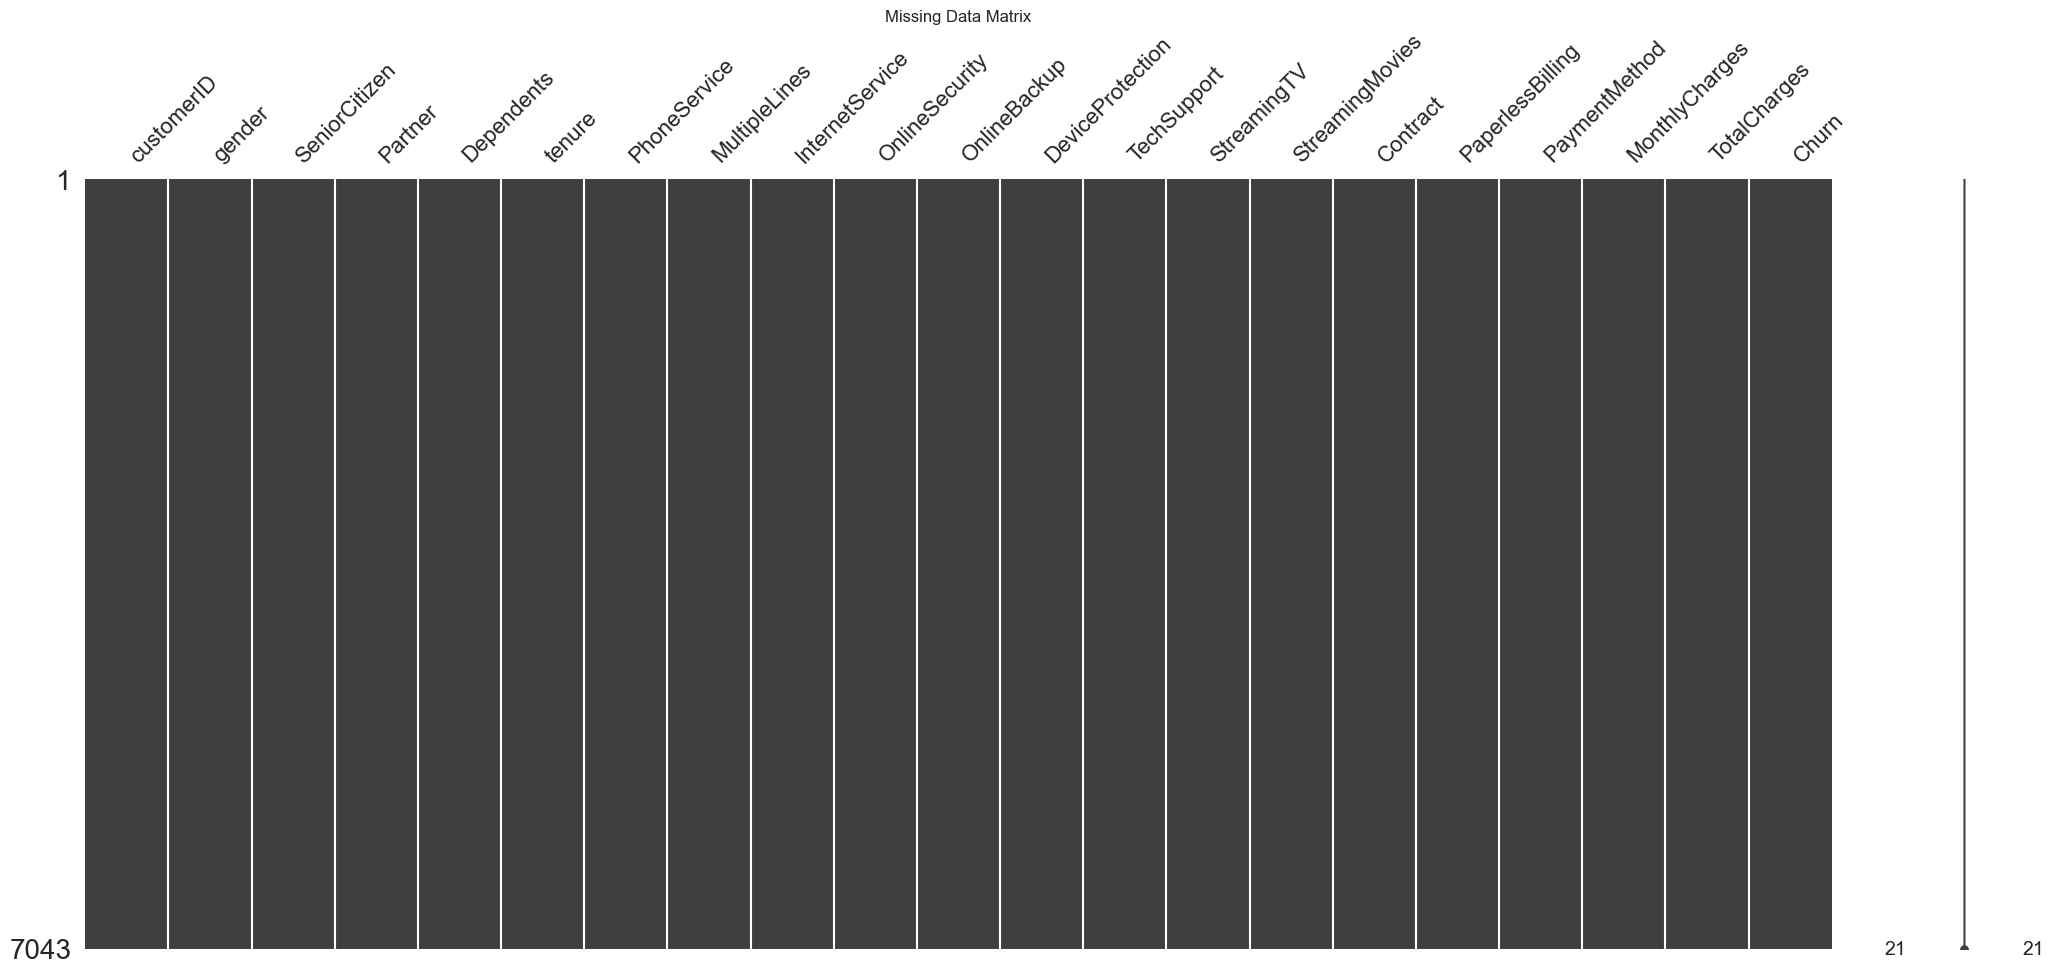

In [2]:
# Check missing values count per column
missing_counts = df.isnull().sum()
print(missing_counts)

# Visualize missing data pattern
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

Meskipun tidak terdapat missing values secara eksplisit dalam dataset, keberadaan nilai `tenure = 0` perlu diperhatikan karena dapat merepresentasikan pelanggan yang baru mendaftar dan belum benar-benar aktif, atau langsung churn pada bulan pertama. Hal ini penting karena bisa mempengaruhi kualitas data dan performa model machine learning, terutama jika jumlahnya kecil namun berdampak besar dalam proses pembelajaran model. Dari sisi bisnis, pelanggan dengan `tenure = 0` mungkin belum sempat menggunakan layanan secara penuh, sehingga berpotensi mencerminkan signup palsu atau pembatalan instan. Oleh karena itu, baris dengan nilai ini sebaiknya dianalisis lebih lanjut, dipertimbangkan untuk dipisahkan, atau bahkan dibuang jika tidak relevan.

In [3]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Dari tabel yang ditampilkan, terlihat bahwa seluruh baris dengan `tenure = 0` memiliki nilai `TotalCharges` yang kosong (missing). Ini memperkuat indikasi adanya **anomali data**, karena secara logika bisnis, jika seorang pelanggan sudah memiliki `MonthlyCharges` tetapi `TotalCharges` kosong, hal ini tidak konsisten. Seharusnya, meskipun pelanggan baru, `TotalCharges` minimal setara dengan `MonthlyCharges` jika telah berjalan satu bulan. Selain itu, sebagian besar pelanggan ini memiliki kontrak jangka panjang seperti "Two year", yang tidak wajar jika langsung berstatus tenure = 0 tanpa adanya tagihan. Temuan ini menunjukkan bahwa baris-baris tersebut kemungkinan merupakan data yang belum tereksekusi penuh dalam sistem atau input yang belum lengkap. Maka, penting untuk memperlakukan baris ini secara khusus—baik dengan membersihkan, memisahkan, atau mengecualikan dari pelatihan model tergantung pada tujuan analisisnya.


In [4]:
df = df[df['tenure'] != 0]
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Terdapat anomali pada data dengan tenure = 0, di mana nilai TotalCharges tidak terisi. Hal ini wajar karena pelanggan tersebut baru bergabung sehingga belum memiliki tagihan dan status churn-nya belum dapat diketahui dengan jelas. Sesuai kesepakatan, 11 baris dengan tenure = 0 dihapus dari dataset karena dianggap tidak merepresentasikan perilaku pelanggan aktif. Data ini hanya mencakup sekitar 0.15% dari total, sehingga dampaknya terhadap analisis sangat kecil. Keputusan ini juga didukung oleh literatur, di mana menurut Schafer (1999) dan Bennett (2001), data yang hilang kurang dari 5% umumnya tidak menyebabkan bias signifikan jika dihapus secara langsung. Oleh karena itu, penghapusan dilakukan untuk keperluan EDA maupun pelatihan model machine learning.

### 2.3 Duplicated Values Checking

In [5]:
# Count duplicated rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


Hasil pemeriksaan duplikasi dengan fungsi `df.duplicated().sum()` menunjukkan bahwa tidak terdapat baris yang sama persis (duplikat) dalam dataset, yaitu sejumlah 0 baris duplikat. Hal ini menandakan bahwa setiap entri dalam data bersifat unik setelah penghapusan baris dengan `tenure = 0`, sehingga tidak diperlukan tindakan lebih lanjut terkait duplikasi. Keberadaan data yang bebas duplikasi sangat penting untuk menjaga kualitas analisis dan mencegah bias yang dapat muncul pada tahap pelatihan model machine learning.

### 2.4 Dataset Restructuring for Better EDA

In [6]:
# Convert object columns to category dtype
object_cols = df.select_dtypes(include=['object']).columns.tolist()
object_cols = [col for col in object_cols if col not in ('customerID', 'TotalCharges')]
df[object_cols] = df[object_cols].astype('category')
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'}).astype('category')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 non-nu

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Untuk menyederhanakan analisis dan mengoptimalkan penggunaan memori, seluruh kolom bertipe `object`—kecuali `customerID` dan `TotalCharges`—diubah menjadi tipe data `category`, karena kolom-kolom ini merepresentasikan data kategorikal. Selain itu, kolom `SeniorCitizen`, yang semula berupa numerik biner (0 dan 1), dipetakan menjadi kategori `"No"` dan `"Yes"` untuk meningkatkan interpretabilitas. Kolom `TotalCharges` juga dikonversi ke tipe numerik (`float64`) dengan `errors='coerce'` untuk memastikan konsistensi data. Setelah transformasi, dataset terdiri dari 21 kolom dengan 17 kolom bertipe kategori, 2 numerik kontinu (`MonthlyCharges`, `TotalCharges`), 1 numerik diskrit (`tenure`), dan 1 kolom identitas (`customerID`). Transformasi ini berhasil memperbaiki struktur data untuk keperluan analisis eksploratif dan pemodelan lebih lanjut.

### 2.5 Exploratory Data Analysis (EDA) - Univariat

In [8]:
def plot_box_and_kde(df, col, figsize=(15, 5)):
    # Visualisasi
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.suptitle(f'Distribution of {col}', fontsize=16, y=1.02)
    sns.boxplot(data=df, x=col, orient='h', ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}')

    sns.kdeplot(data=df, x=col, fill=True, ax=axes[1])
    axes[1].set_title(f'KDE Histplot of {col}')

    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()

    # Statistik deskriptif + IQR
    stats = df[col].describe()
    q1 = stats['25%']
    q3 = stats['75%']
    iqr = q3 - q1
    stats['IQR'] = iqr

    # Tabel transpos
    stats_df = stats.to_frame(name=col).T
    display(stats_df)

Fungsi plot_box_and_kde digunakan untuk menganalisis variabel numerik seperti 'tenure'. Fungsi ini menyajikan dua plot berdampingan: sebuah boxplot untuk melihat ringkasan statistik (median, kuartil, jangkauan) dan sebuah KDE plot untuk melihat bentuk distribusi data. Selain visualisasi, fungsi ini juga menampilkan tabel statistik deskriptif yang mencakup mean, standar deviasi, dan IQR (Interquartile Range) untuk memberikan ringkasan kuantitatif.

In [9]:
def plot_countplot_with_hue(df, col, figsize=(15, 5)):
    # Hitung Count dan Persentase
    counts = df[col].value_counts()
    percentages = counts / len(df) * 100
    total = len(df)

    # Buat urutan berdasarkan Count tertinggi ke terendah
    ordered_categories = counts.index.tolist()
    df[col] = pd.Categorical(df[col], categories=ordered_categories, ordered=True)

    # Plot
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, y=col, hue=col)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel('Count')
    plt.ylabel('')

    for p in ax.patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        label = f'{int(width)} ({width / total:.1%})'
        ax.text(width + total * 0.005, y, label, va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

Untuk variabel kategorikal, fungsi plot_countplot_with_hue digunakan. Fungsi ini menghitung frekuensi setiap kategori, mengurutkannya dari yang terbesar, lalu menampilkannya dalam bentuk countplot horizontal. Setiap bar pada plot diberi anotasi yang menunjukkan jumlah absolut dan persentase relatifnya, sehingga memberikan gambaran distribusi yang jelas dan informatif.

In [10]:
def check_normality(df, col):
  # Ambil data dari kolom yang ditentukan dan hapus nilai yang hilang.
  data_to_test = df[col].dropna()

  # Jalankan uji D'Agostino-Pearson dan ambil p-value.
  statistic, p_value = normaltest(data_to_test)
  
  # Tampilkan nilai p-value-nya.
  print(f"P-value untuk kolom '{col}': {p_value:.2f}")

  # Cek p-value untuk mencetak konklusi hipotesis.
  if p_value < 0.05:
    print(f"Tolak Ho, terima Ha. Data '{col}' tidak terdistribusi normal.")
  else:
    print(f"Gagal tolak Ho. Data '{col}' terdistribusi normal.")

Fungsi ini bertujuan untuk menguji secara statistik Bagaimanakah data dalam sebuah kolom mengikuti distribusi normal atau tidak. Ia mengambil data dari kolom yang ditentukan, menjalankan uji normalitas D'Agostino-Pearson, lalu mencetak nilai p-value yang dihasilkan. Berdasarkan p-value tersebut, fungsi ini memberikan kesimpulan statistik Bagaimanakah kita harus menolak atau gagal menolak hipotesis nol, yang pada akhirnya menentukan Bagaimanakah data tersebut dianggap normal atau tidak.
- Ho: Data terdistribusi normal.
- Ha: Data tidak terdistribusi normal.

#### 2.5.1 Berapa lama pelanggan biasanya tetap berlangganan layanan?

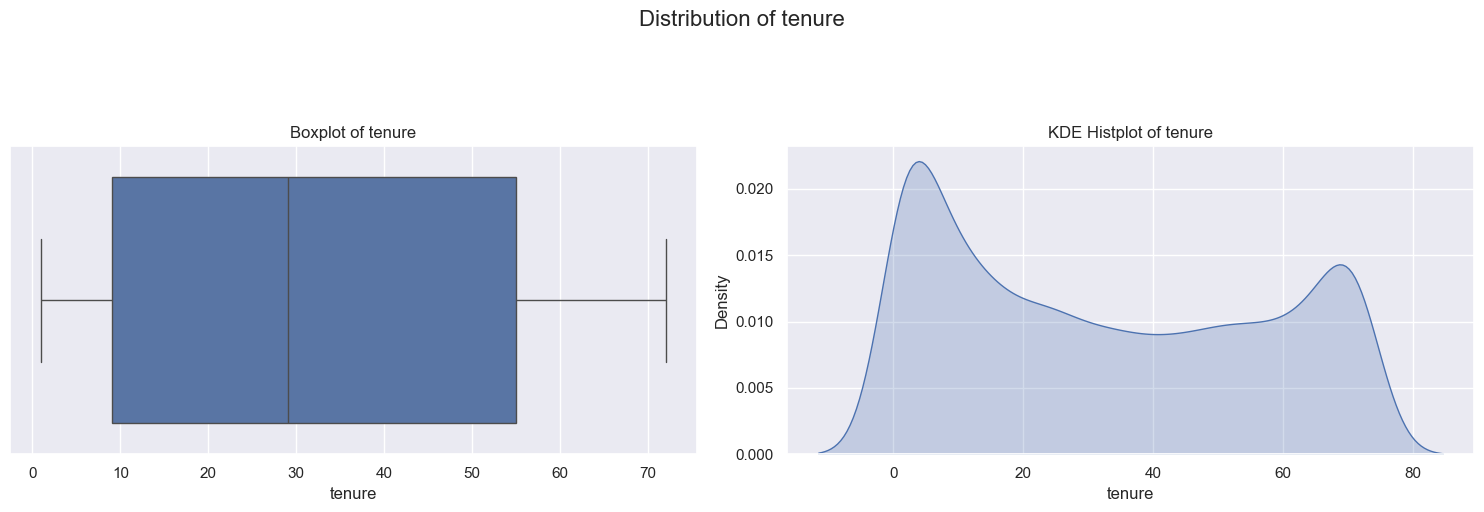

,count,mean,std,min,25%,50%,75%,max,IQR
tenure,7032.0,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0,46.0


P-value untuk kolom 'tenure': 0.00
Tolak Ho, terima Ha. Data 'tenure' tidak terdistribusi normal.


In [11]:
plot_box_and_kde(df, 'tenure')
check_normality(df,'tenure')

##### Business Insights

- **Distribusi `tenure` pelanggan bersifat bimodal.** Ini artinya, pelanggan cenderung terdiri dari dua kelompok besar: mereka yang masih sangat baru, dan mereka yang sudah sangat lama dan setia.

- **Terdapat konsentrasi pelanggan yang sangat tinggi pada masa awal berlangganan (sekitar 1-9 bulan).** Hal ini menunjukkan banyak pelanggan baru yang mendaftar, namun periode awal ini sangat rentan karena pelanggan bisa berhenti berlangganan kapan saja.

- **Sebuah kelompok besar pelanggan menunjukkan loyalitas yang luar biasa dengan bertahan hingga masa berlangganan maksimal (72 bulan).** Hal ini membuktikan bahwa layanan berhasil mempertahankan sekelompok pelanggan untuk jangka panjang.

#### 2.5.2 Berapa besar total pengeluaran pelanggan selama mereka berlangganan?

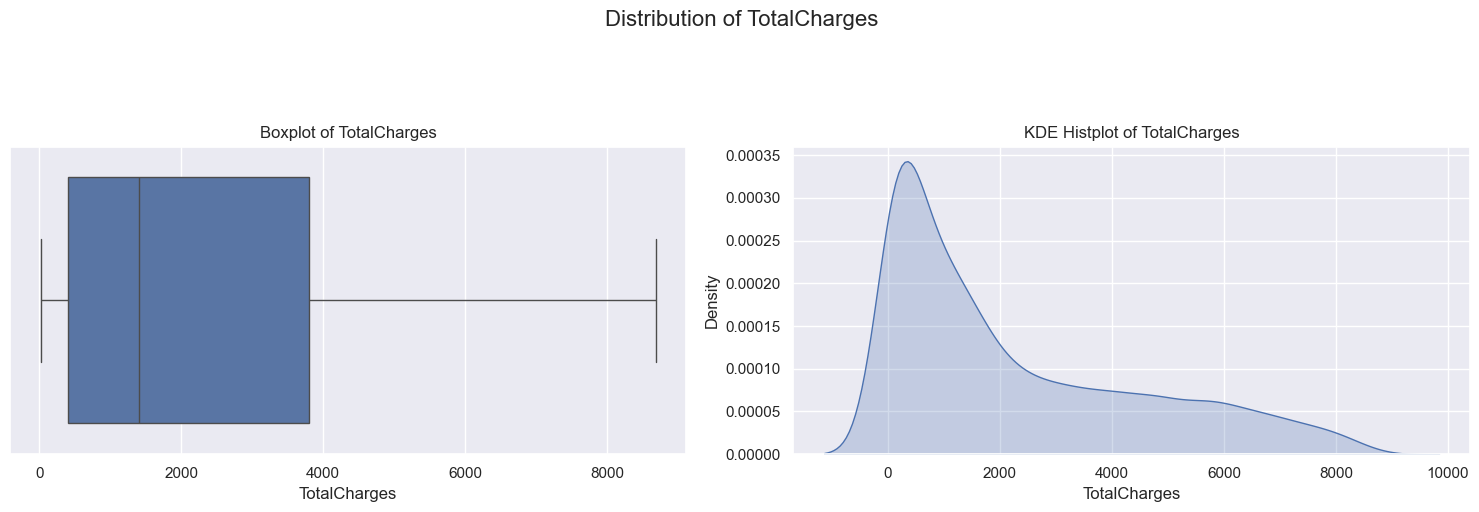

,count,mean,std,min,25%,50%,75%,max,IQR
TotalCharges,7032.0,2283.300441,2266.771362,18.8,401.45,1397.475,3794.7375,8684.8,3393.2875


P-value untuk kolom 'TotalCharges': 0.00
Tolak Ho, terima Ha. Data 'TotalCharges' tidak terdistribusi normal.


In [12]:
plot_box_and_kde(df, 'TotalCharges')
check_normality(df, 'TotalCharges')

##### Business Insights

- **Distribusi `TotalCharges` sangat condong ke kanan (*right-skewed*).** Ini artinya, sebagian besar pelanggan memiliki riwayat total belanja yang relatif rendah, sementara hanya sedikit pelanggan yang memiliki total belanja sangat tinggi.

- **Pola `TotalCharges` ini mencerminkan distribusi `tenure`.** Tingginya jumlah pelanggan dengan `TotalCharges` rendah konsisten dengan temuan sebelumnya, di mana banyak pelanggan baru berhenti berlangganan di awal dan belum mengakumulasi banyak tagihan.

#### 2.5.3 Berapa biaya bulanan yang biasanya dibayarkan pelanggan?

In [ ]:
plot_box_and_kde(df, 'MonthlyCharges')
check_normality(df, 'MonthlyCharges')

##### Business Insights

- **Distribusi `MonthlyCharges` bersifat bimodal, dengan satu puncak di harga rendah dan satu lagi di harga tinggi.** Hal ini mengindikasikan bahwa pelanggan cenderung terkumpul pada dua kelompok paket layanan: paket dasar berbiaya rendah dan paket premium yang lebih mahal.

- **Jumlah pelanggan di rentang tagihan bulanan menengah (sekitar $30 - $65) jauh lebih sedikit.** "Celah" ini menunjukkan bahwa struktur penawaran produk mendorong pelanggan untuk memilih antara paket paling dasar atau paket yang paling lengkap, dengan sedikit peminat untuk paket di kelas menengah.

#### 2.5.4 Bagaimana distribusi status churn pelanggan?

In [ ]:
plot_countplot_with_hue(df, 'Churn')

##### Business Insights

- **Jumlah pelanggan yang tidak *churn* jauh lebih banyak daripada yang *churn*.** Hal ini menunjukkan bahwa dataset bersifat tidak seimbang (*imbalanced*), di mana mayoritas pelanggan pada periode ini tetap setia pada layanan.

- **Tingkat *churn* (pelanggan berhenti) berada di sekitar 26%.** Meskipun pelanggan yang bertahan lebih banyak, kehilangan lebih dari seperempat total pelanggan adalah angka yang signifikan dan menunjukkan adanya masalah retensi.

#### 2.5.5 Bagaimana karakteristik distribusi pelanggan berdasarkan jenis kelamin?

In [ ]:
plot_countplot_with_hue(df, 'gender')

##### Business Insights

- **Tingkat *churn* antara pelanggan pria dan wanita hampir identik.** Hal ini menunjukkan bahwa faktor gender tampaknya bukan pendorong utama yang membuat pelanggan berhenti berlangganan dalam dataset ini.

#### 2.5.6 Bagaimana karakteristik distribusi pelanggan berdasarkan status lansia?

In [ ]:
plot_countplot_with_hue(df, 'SeniorCitizen')

##### Business Insights

- **Jumlah pelanggan non-senior jauh lebih banyak dibandingkan pelanggan *Senior Citizen*.** Hal ini menunjukkan bahwa segmen *Senior Citizen* merupakan kelompok minoritas dalam keseluruhan basis pelanggan yang dianalisis.

#### 2.5.7 Bagaimana karakteristik distribusi pelanggan berdasarkan status memiliki pasangan?

In [ ]:
plot_countplot_with_hue(df, 'Partner')

##### Business Insights

- **Jumlah pelanggan yang tidak memiliki pasangan sedikit lebih banyak daripada yang memiliki pasangan.** Hal ini menunjukkan bahwa komposisi pelanggan cukup seimbang dari sisi status pasangan, meskipun sedikit lebih banyak yang lajang.

#### 2.5.8 Bagaimana karakteristik distribusi pelanggan berdasarkan tanggungan keluarga?

In [ ]:
plot_countplot_with_hue(df, 'Dependents')

##### Business Insights

- **Jumlah pelanggan yang tidak memiliki tanggungan (*Dependents*) jauh lebih banyak daripada yang memiliki tanggungan.** Hal ini menunjukkan bahwa mayoritas basis pelanggan adalah individu mandiri tanpa tanggungan.

#### 2.5.9 Bagaimana karakteristik distribusi pelanggan berdasarkan kepemilikan layanan telepon ?

In [ ]:
plot_countplot_with_hue(df, 'PhoneService')

##### Business Insights

- **Sebagian besar pelanggan memiliki layanan telepon (*Phone Service*).** Hal ini menunjukkan bahwa layanan telepon adalah produk yang sangat umum dan dimiliki oleh hampir semua pelanggan dalam dataset ini.

#### 2.5.10 Bagaimana karakteristik distribusi pelanggan berdasarkan kepemilikan beberapa saluran telepon?

In [ ]:
plot_countplot_with_hue(df, 'MultipleLines')

##### Business Insights

- **Jumlah pelanggan dengan satu jalur telepon (`No`) adalah yang terbanyak, diikuti oleh yang memiliki beberapa jalur (`Yes`).** Hal ini menunjukkan bahwa mayoritas pelanggan yang memiliki layanan telepon tidak memilih untuk menambah layanan *multiple lines*.

#### 2.5.11 Bagaimana karakteristik distribusi pelanggan berdasarkan jenis layanan internet?

In [ ]:
plot_countplot_with_hue(df, 'InternetService')

##### Business Insights

- **Jumlah pelanggan yang menggunakan *Fiber optic* adalah yang paling banyak, sedikit di atas pengguna *DSL*.** Hal ini menunjukkan bahwa layanan internet, khususnya *Fiber optic*, merupakan produk yang populer di kalangan basis pelanggan ini.

#### 2.5.12 Bagaimana karakteristik distribusi pelanggan berdasarkan status perlindungan keamanan online?

In [ ]:
plot_countplot_with_hue(df, 'OnlineSecurity')

##### Business Insights

- **Di antara pelanggan internet, lebih banyak yang tidak memiliki layanan tambahan *Online Security* dibandingkan yang memilikinya.** Hal ini menunjukkan bahwa *Online Security* bukanlah *add-on* yang populer atau dianggap esensial oleh mayoritas pelanggan internet.

#### 2.5.13 Bagaimana karakteristik distribusi pelanggan berdasarkan status cadangan data online?

In [ ]:
plot_countplot_with_hue(df, 'OnlineBackup')

##### Business Insights

- **Di antara pelanggan internet, jumlah yang tidak memiliki layanan *Online Backup* sedikit lebih banyak daripada yang memilikinya.** Hal ini menunjukkan bahwa adopsi *add-on* ini lebih seimbang dibandingkan *Online Security*, meskipun masih belum menjadi pilihan mayoritas.

#### 2.5.14 Bagaimana karakteristik distribusi pelanggan berdasarkan perlindungan perangkat?

In [ ]:
plot_countplot_with_hue(df, 'DeviceProtection')

##### Business Insights

- **Di antara pelanggan internet, jumlah yang tidak memiliki layanan *Device Protection* sedikit lebih banyak daripada yang memilikinya.** Pola adopsi ini mirip dengan *Online Backup*, menunjukkan tingkat permintaan yang serupa untuk kedua layanan tambahan tersebut.

#### 2.5.15 Bagaimana karakteristik distribusi pelanggan berdasarkan dukungan teknis?

In [ ]:
plot_countplot_with_hue(df, 'TechSupport')

##### Business Insights

- **Di antara pelanggan internet, lebih banyak yang tidak memiliki layanan *Tech Support* dibandingkan yang memilikinya.** Pola adopsi ini mirip dengan *Online Security*, menunjukkan bahwa layanan tambahan ini juga bukan pilihan mayoritas pelanggan.

#### 2.5.16 Bagaimana karakteristik distribusi pelanggan berdasarkan layanan streaming TV?

In [ ]:
plot_countplot_with_hue(df, 'StreamingTV')

##### Business Insights

- **Di antara pelanggan internet, jumlah yang berlangganan *Streaming TV* hampir sama dengan yang tidak berlangganan.** Hal ini menunjukkan bahwa *Streaming TV* adalah layanan tambahan yang populer dan diminati oleh sekitar setengah dari basis pelanggan internet.

#### 2.5.17 Bagaimana karakteristik distribusi pelanggan berdasarkan layanan streaming film?


In [ ]:
plot_countplot_with_hue(df, 'StreamingMovies')

##### Business Insights

- **Di antara pelanggan internet, jumlah yang berlangganan *Streaming Movies* juga hampir sama dengan yang tidak berlangganan.** Pola adopsi ini sangat mirip dengan layanan *Streaming TV*, menunjukkan bahwa kedua layanan hiburan ini memiliki tingkat permintaan yang serupa.

#### 2.5.18 Bagaimana karakteristik distribusi pelanggan berdasarkan jenis kontrak langganan?


In [ ]:
plot_countplot_with_hue(df, 'Contract')

##### Business Insights

- **Kontrak `Month-to-month` (bulanan) adalah jenis kontrak yang paling umum di antara pelanggan.** Hal ini menunjukkan mayoritas pelanggan lebih memilih fleksibilitas kontrak jangka pendek daripada terikat dengan komitmen jangka panjang.

#### 2.5.19 Bagaimana karakteristik distribusi pelanggan berdasarkan metode paperless?

In [ ]:
plot_countplot_with_hue(df, 'PaperlessBilling')

##### Business Insights

- **Jumlah pelanggan yang menggunakan *Paperless Billing* lebih banyak daripada yang tidak.** Hal ini menunjukkan bahwa mayoritas pelanggan lebih memilih untuk menerima tagihan secara digital daripada melalui surat fisik.

#### 2.5.20 Bagaimana karakteristik distribusi pelanggan berdasarkan metode pembayaran?


In [ ]:
plot_countplot_with_hue(df, 'PaymentMethod')

##### Business Insights

- ***Electronic check* adalah metode pembayaran yang paling banyak digunakan oleh pelanggan.** Hal ini menunjukkan bahwa pembayaran manual non-otomatis masih menjadi pilihan utama, mengalahkan metode pembayaran otomatis seperti transfer bank atau kartu kredit.

### 2.6 Exploratory Data Analysis (EDA) - Bivariat

In [ ]:
def plot_box_and_kde_churn(df, col, target='Churn', figsize=(15, 6)):
    # Visualisasi
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.suptitle(f'Distribution of {col} Based on {target}', fontsize=16, y=1.02)

    # Boxplot berdasarkan Churn
    # Menggunakan y=target untuk membuat boxplot terpisah untuk setiap kategori Churn
    sns.boxplot(data=df, x=col, y=target, orient='h', ax=axes[0], hue=target)
    axes[0].set_title(f'Boxplot of {col}')

    # KDE plot berdasarkan Churn
    # Menggunakan hue=target untuk membuat kurva distribusi terpisah
    sns.kdeplot(data=df, x=col, hue=target, fill=True, common_norm=False, alpha=0.5, ax=axes[1])
    axes[1].set_title(f'Distribution of {col}')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Statistik deskriptif yang dikelompokkan berdasarkan Churn
    stats = df.groupby(target)[col].describe()
    q1 = stats['25%']
    q3 = stats['75%']
    iqr = q3 - q1
    stats['IQR'] = iqr

    # Tampilkan tabel statistik
    display(stats)

Fungsi `plot_box_and_kde_churn` digunakan untuk menganalisis distribusi variabel numerik berdasarkan kategori target seperti 'Churn'. Fungsi ini menghasilkan dua visualisasi berdampingan: boxplot horizontal yang memisahkan data berdasarkan nilai target untuk mengamati sebaran dan potensi outlier, serta KDE plot (Kernel Density Estimate) untuk melihat pola distribusi tiap kategori secara halus. Selain visualisasi, fungsi ini menghitung dan menampilkan tabel statistik deskriptif (count, mean, std, min, kuartil, dan IQR) yang dikelompokkan berdasarkan nilai target, sehingga mempermudah perbandingan karakteristik numerik antar kategori.


In [ ]:
def plot_stacked_barh_churn(df, col, target='Churn', figsize=(15, 5)):
    # Hitung count & percentage
    counts = df.groupby([col, target], observed=True).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    # Pastikan kolom urut: No, Yes
    desired_order = ['No', 'Yes']
    actual_order = [c for c in desired_order if c in percentages.columns]
    counts = counts[actual_order]
    percentages = percentages[actual_order]

    # Ascending True
    sort_order = percentages['No'].sort_values(ascending=True).index
    counts = counts.loc[sort_order]
    percentages = percentages.loc[sort_order]

    # Visualisasi manual
    fig, ax = plt.subplots(figsize=figsize)
    left = [0] * len(percentages)

    for status in actual_order:
        values = percentages[status]
        bar = ax.barh(percentages.index, values, left=left, label=status)

        for i, (pct, cnt) in enumerate(zip(values, counts[status])):
            if pct > 0:
                ax.text(left[i] + pct / 2, i, f'{pct:.1f}%\n({cnt})',
                        ha='center', va='center', fontsize=8,
                        color='white' if pct > 15 else 'black')
        left = [l + v for l, v in zip(left, values)]

    plt.suptitle(f'Distribution of {col} Based on {target}', fontsize=16, y=1.02)
    ax.set_xlabel('Percentage')
    ax.set_ylabel('')
    ax.legend(title=target, loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()
    plt.show()

Fungsi `plot_stacked_barh_churn` digunakan untuk memvisualisasikan distribusi variabel kategorikal berdasarkan target seperti 'Churn' dalam bentuk stacked bar chart horizontal. Fungsi ini menghitung jumlah dan persentase tiap kategori target dalam setiap kelas variabel, lalu mengurutkan data berdasarkan persentase kategori 'No' secara menaik. Visualisasi menampilkan batang tersegmentasi untuk masing-masing kategori target, disertai anotasi berupa persentase dan jumlah absolut untuk mempermudah interpretasi. Fungsi ini sangat berguna untuk membandingkan proporsi churn antar kategori dan mengidentifikasi kelompok dengan tingkat churn tinggi.


In [ ]:
def plot_scatter_with_reg(df, x, y, hue='Churn', figsize=(10, 8)):
    plt.figure(figsize=figsize)
    sns.scatterplot(data=df, x=x, y=y, hue=hue, alpha=0.6)
    sns.regplot(data=df, x=x, y=y, scatter=False, color='red')
    plt.title(f'Relationship of {x} and {y}', fontsize=14)
    plt.tight_layout()
    plt.show()

Fungsi `plot_scatter_with_reg` digunakan untuk memvisualisasikan hubungan antara dua variabel numerik dengan tambahan segmentasi berdasarkan kategori target seperti 'Churn'. Fungsi ini menampilkan scatter plot berwarna berdasarkan kategori target untuk mengamati pola penyebaran data, serta menambahkan garis regresi berwarna merah sebagai representasi tren umum hubungan antara kedua variabel. Visualisasi ini bermanfaat untuk mengevaluasi korelasi dan mengidentifikasi potensi perbedaan pola antar segmen churn.


In [ ]:
def mannwhitney_test(df, col, target='Churn'):
    # Pastikan hanya ada dua kategori pada target
    categories = df[target].dropna().unique()
    if len(categories) != 2:
        raise ValueError(f"Kolom target '{target}' harus memiliki tepat 2 kategori (misal: 'Yes' dan 'No').")

    # Ambil data dari masing-masing grup
    group1 = df[df[target] == categories[0]][col].dropna()
    group2 = df[df[target] == categories[1]][col].dropna()

    # Uji Mann-Whitney U dua arah
    stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

    # Tampilkan hasil
    print(f"P-value untuk uji Mann-Whitney U antara '{categories[0]}' dan '{categories[1]}' pada kolom '{col}': {p_value:.4f}")
    if p_value < 0.05:
        print(f"Tolak Ho, terima Ha. Terdapat perbedaan signifikan antara grup '{categories[0]}' dan '{categories[1]}' untuk '{col}'.")
    else:
        print(f"Gagal tolak Ho. Tidak terdapat perbedaan signifikan antara grup '{categories[0]}' dan '{categories[1]}' untuk '{col}'.")


Fungsi ini bertujuan untuk menguji Bagaimanakah terdapat perbedaan yang signifikan secara statistik antara dua kelompok pada kolom numerik tertentu berdasarkan kategori target seperti 'Churn'. Ia menggunakan uji non-parametrik Mann-Whitney U, yang cocok digunakan saat data tidak diasumsikan berdistribusi normal. Fungsi ini membandingkan distribusi nilai antara dua grup (misalnya 'Yes' dan 'No'), menghasilkan nilai p-value, dan memberikan interpretasi Bagaimanakah hipotesis nol dapat ditolak atau tidak.
- Ho: Tidak ada perbedaan signifikan antara kedua grup.
- Ha: Terdapat perbedaan signifikan antara kedua grup.


In [ ]:
def spearman_test(df, col1, col2='Churn'):
    # Ambil data dan hapus missing values di kedua kolom
    data = df[[col1, col2]].dropna()

    # Encode kolom target jika bertipe kategorik (misal: 'Yes'/'No' -> 1/0)
    if data[col2].dtype.name == 'category' or data[col2].dtype == object:
        data[col2] = data[col2].astype('category').cat.codes

    # Hitung korelasi Spearman
    stat, p_value = spearmanr(data[col1], data[col2])

    # Tampilkan hasil
    print(f"Hasil uji Spearman antara '{col1}' dan '{col2}':")
    print(f"  Statistik korelasi (Spearman's rho): {stat:.4f}")
    print(f"  P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"  Tolak Ho, terima Ha. Terdapat korelasi signifikan antara '{col1}' dan '{col2}'.")
    else:
        print(f"  Gagal tolak Ho. Tidak terdapat korelasi signifikan antara '{col1}' dan '{col2}'.")


Fungsi ini digunakan untuk menguji Bagaimanakah terdapat hubungan monotonic yang signifikan antara dua variabel menggunakan uji korelasi Spearman. Fungsi ini secara otomatis menangani variabel kategorik dengan mengubahnya menjadi nilai numerik sebelum perhitungan. Ia menghitung koefisien korelasi Spearman (rho) dan p-value untuk menentukan Bagaimanakah hubungan antara dua kolom (misalnya antara fitur numerik dan 'Churn') signifikan secara statistik atau tidak.

- Ho: Tidak terdapat korelasi signifikan antara kedua variabel.
- Ha: Terdapat korelasi signifikan antara kedua variabel.


#### 2.6.1 Bagaimanakah terdapat perbedaan lama pelanggan berlangganan antara yang churn dan tidak churn?

In [ ]:
plot_box_and_kde_churn(df, 'tenure')
mannwhitney_test(df, 'tenure')

##### Business Insights

- **Setengah dari pelanggan yang *churn* berhenti sebelum bulan ke-10, sementara setengah dari pelanggan setia bertahan melewati tahun ketiga (38 bulan).** Hal ini menunjukkan adanya "zona bahaya" di 10 bulan pertama di mana pelanggan sangat rentan untuk pergi, sementara pelanggan yang loyal adalah aset jangka panjang yang sangat berharga.

#### 2.6.2 Bagaimanakah terdapat perbedaan total pengeluaran pelanggan antara yang churn dan tidak churn?


In [ ]:
plot_box_and_kde_churn(df, 'TotalCharges')
mannwhitney_test(df, 'TotalCharges')

##### Business Insights

- **Secara total, pelanggan setia telah membayar hampir 2.4 kali lebih banyak ($1684) dibanding pelanggan yang berhenti ($704).** Ini membuktikan bahwa semakin lama pelanggan bertahan, semakin besar keuntungan yang mereka bawa untuk perusahaan.

#### 2.6.3 Bagaimanakah terdapat perbedaan biaya bulanan pelanggan antara yang churn dan tidak churn?


In [ ]:
plot_box_and_kde_churn(df, 'MonthlyCharges')
mannwhitney_test(df, 'MonthlyCharges')

##### Business Insights

- **Pelanggan yang berhenti biasanya memiliki tagihan bulanan lebih mahal ($80) daripada pelanggan yang setia ($64).** Ini berarti, tagihan yang tinggi, meskipun baik untuk pendapatan, bisa menjadi pemicu bagi pelanggan untuk berhenti berlangganan.

#### 2.6.4 Bagaimanakah terdapat perbedaan tingkat churn antara pelanggan laki-laki dan perempuan?


In [ ]:
plot_stacked_barh_churn(df, 'gender')

##### Business Insights

- **Jumlah pelanggan pria dan wanita dalam dataset ini hampir seimbang.** Hal ini menunjukkan bahwa tidak ada dominasi gender tertentu dalam basis pelanggan.

#### 2.6.5 Bagaimanakah terdapat perbedaan tingkat churn antara pelanggan lansia dan non-lansia?


In [ ]:
plot_stacked_barh_churn(df, 'SeniorCitizen')

##### Business Insights

- **Tingkat *churn* pada pelanggan *Senior Citizen* secara signifikan lebih tinggi (sekitar 42%) dibandingkan pelanggan non-senior (sekitar 24%).** Hal ini menyoroti bahwa segmen senior merupakan kelompok berisiko tinggi yang memerlukan perhatian khusus dalam strategi retensi.

#### 2.6.6 Bagaimanakah terdapat perbedaan tingkat churn antara pelanggan yang memiliki pasangan dan yang tidak?


In [ ]:
plot_stacked_barh_churn(df, 'Partner')

##### Business Insights

- **Tingkat *churn* lebih tinggi pada pelanggan yang tidak memiliki partner (sekitar 33%) dibandingkan dengan yang memiliki partner (sekitar 20%).** Hal ini menunjukkan bahwa pelanggan yang memiliki partner cenderung lebih setia dan tidak mudah berhenti berlangganan.

#### 2.6.7 Bagaimanakah terdapat perbedaan tingkat churn antara pelanggan yang memiliki tanggungan dan yang tidak?


In [ ]:
plot_stacked_barh_churn(df, 'Dependents')

##### Business Insights

- **Tingkat *churn* lebih tinggi pada pelanggan yang tidak memiliki tanggungan (sekitar 31%) dibandingkan dengan yang memiliki tanggungan (sekitar 16%).** Hal ini menunjukkan bahwa pelanggan yang memiliki tanggungan, seperti anak, cenderung lebih setia dan tidak mudah berhenti berlangganan.

#### 2.6.8 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan layanan telepon dan yang tidak?


In [ ]:
plot_stacked_barh_churn(df, 'PhoneService')

##### Business Insights

- **Tingkat *churn* pada pelanggan yang memiliki layanan telepon (sekitar 27%) hampir sama dengan yang tidak memiliki (sekitar 25%).** Hal ini menunjukkan bahwa kepemilikan layanan telepon dasar bukanlah faktor pembeda yang signifikan dalam keputusan pelanggan untuk berhenti berlangganan.

#### 2.6.9 Bagaimanakah tingkat churn berbeda antara pelanggan yang memiliki beberapa saluran telepon, satu saluran, atau tidak menggunakan layanan telepon?


In [ ]:
plot_stacked_barh_churn(df, 'MultipleLines')

##### Business Insights

- **Pelanggan dengan layanan *Multiple Lines* memiliki tingkat *churn* yang sedikit lebih tinggi (sekitar 29%) dibandingkan pelanggan dengan satu jalur telepon (sekitar 25%).** Hal ini menunjukkan bahwa layanan tambahan ini, meskipun meningkatkan pendapatan, juga berkorelasi dengan risiko *churn* yang sedikit lebih besar.

#### 2.6.10 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan DSL, fiber optic, atau tidak menggunakan layanan internet?


In [ ]:
plot_stacked_barh_churn(df, 'InternetService')

##### Business Insights

- **Pelanggan dengan layanan *Fiber optic* memiliki tingkat *churn* yang sangat tinggi, yaitu sekitar 42%.** Ini berarti hampir separuh dari pelanggan layanan internet premium ini berhenti berlangganan.

- **Sebaliknya, pelanggan *DSL* memiliki tingkat *churn* yang jauh lebih rendah, yaitu sekitar 19%.** Angka ini menunjukkan bahwa pelanggan DSL lebih dari dua kali lebih setia dibandingkan pelanggan Fiber optic.

- **Secara keseluruhan, terdapat paradoks di mana produk internet paling premium (*Fiber optic*) justru menjadi sumber *churn* terbesar.** Hal ini menandakan adanya masalah fundamental yang mungkin terkait dengan harga, kualitas layanan, atau ekspektasi pelanggan pada layanan Fiber optic.

#### 2.6.11 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan perlindungan keamanan online, tidak menggunakan, atau tidak memiliki layanan internet?


In [ ]:
plot_stacked_barh_churn(df, 'OnlineSecurity')

##### Business Insights

- **Pelanggan internet yang tidak memiliki *Online Security* memiliki tingkat *churn* yang sangat tinggi, yaitu sekitar 42%.** Angka ini menunjukkan bahwa kelompok pelanggan ini adalah salah satu segmen yang paling berisiko.

- **Sebaliknya, pelanggan yang memiliki *Online Security* tingkat *churn*-nya sangat rendah, yaitu sekitar 15%.** Hal ini menjadikan *Online Security* sebagai salah satu layanan tambahan yang paling efektif dalam mempertahankan pelanggan.

- **Secara keseluruhan, tidak memiliki *Online Security* adalah indikator risiko *churn* yang sangat kuat.** Pelanggan internet tanpa layanan ini hampir tiga kali lebih mungkin untuk berhenti berlangganan dibandingkan yang memilikinya.

#### 2.6.12 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan cadangan data online, tidak menggunakan, atau tidak memiliki layanan internet?


In [ ]:
plot_stacked_barh_churn(df, 'OnlineBackup')

##### Business Insights

- **Pelanggan internet yang tidak memiliki *Online Backup* memiliki tingkat *churn* yang tinggi, yaitu sekitar 40%.** Ini menempatkan mereka dalam kelompok berisiko tinggi, mirip dengan pelanggan tanpa *Online Security*.

- **Sebaliknya, pelanggan yang memiliki *Online Backup* tingkat *churn*-nya jauh lebih rendah, yaitu sekitar 22%.** Hal ini menunjukkan bahwa layanan *Online Backup* juga merupakan fitur yang efektif untuk mempertahankan pelanggan.

- **Secara keseluruhan, tidak memiliki *Online Backup* adalah indikator risiko *churn* yang kuat.** Pelanggan internet tanpa layanan ini hampir dua kali lebih mungkin untuk berhenti berlangganan dibandingkan yang memilikinya.

#### 2.6.13 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan perlindungan perangkat, tidak menggunakan, atau tidak memiliki layanan internet?


In [ ]:
plot_stacked_barh_churn(df, 'DeviceProtection')

##### Business Insights

- **Pelanggan internet yang tidak memiliki *Device Protection* memiliki tingkat *churn* yang tinggi, yaitu sekitar 39%.** Ini kembali menempatkan pelanggan tanpa layanan tambahan proteksi dalam kelompok berisiko tinggi.

- **Sebaliknya, pelanggan yang memiliki *Device Protection* tingkat *churn*-nya jauh lebih rendah, yaitu sekitar 23%.** Ini menunjukkan bahwa layanan proteksi perangkat juga efektif dalam menjaga loyalitas pelanggan.

- **Secara keseluruhan, tidak memiliki *Device Protection* adalah indikator risiko *churn* yang kuat.** Pola ini konsisten dengan layanan proteksi lainnya seperti *Online Security* dan *Online Backup*.

#### 2.6.14 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan dukungan teknis, tidak menggunakan, atau tidak memiliki layanan internet?


In [ ]:
plot_stacked_barh_churn(df, 'TechSupport')

##### Business Insights

- **Pelanggan internet yang tidak memiliki *Tech Support* memiliki tingkat *churn* yang sangat tinggi, yaitu sekitar 42%.** Ini menjadikan mereka sebagai salah satu segmen pelanggan dengan risiko tertinggi untuk berhenti berlangganan.

- **Sebaliknya, pelanggan yang memiliki *Tech Support* tingkat *churn*-nya sangat rendah, yaitu sekitar 15%.** Hal ini membuktikan bahwa layanan *Tech Support* adalah fitur yang sangat vital untuk mempertahankan pelanggan.

- **Secara keseluruhan, ketiadaan layanan *Tech Support* adalah salah satu prediktor *churn* terkuat.** Pelanggan internet tanpa dukungan teknis ini hampir tiga kali lebih mungkin untuk berhenti berlangganan.

#### 2.6.15 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan layanan streaming TV, tidak menggunakan, atau tidak memiliki layanan internet?


In [ ]:
plot_stacked_barh_churn(df, 'StreamingTV')

##### Business Insights

- **Pelanggan internet yang memiliki layanan *Streaming TV* maupun yang tidak, sama-sama memiliki tingkat *churn* yang tinggi (masing-masing sekitar 30% dan 33%).** Hal ini menunjukkan bahwa layanan *Streaming TV* bukan merupakan faktor pembeda yang kuat untuk retensi; pelanggan tetap berhenti berlangganan pada tingkat yang tinggi terlepas dari ada atau tidaknya layanan ini.

#### 2.6.16 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan layanan streaming film, tidak menggunakan, atau tidak memiliki layanan internet?


In [ ]:
plot_stacked_barh_churn(df, 'StreamingMovies')

##### Business Insights

- **Pola *churn* untuk *Streaming Movies* hampir identik dengan *Streaming TV*, di mana pelanggan dengan atau tanpa layanan ini sama-sama memiliki tingkat *churn* yang tinggi (masing-masing sekitar 30% dan 34%).** Hal ini semakin mengonfirmasi bahwa layanan hiburan tambahan, tidak seperti layanan proteksi, bukanlah faktor kunci yang membuat pelanggan bertahan.

#### 2.6.17 Bagaimanakah tingkat churn berbeda berdasarkan jenis kontrak langganan yang dipilih pelanggan?


In [ ]:
plot_stacked_barh_churn(df, 'Contract')

##### Business Insights

- **Pelanggan dengan kontrak bulanan (`Month-to-month`) memiliki tingkat *churn* yang sangat tinggi, yaitu sekitar 43%.** Ini menjadikan fleksibilitas kontrak sebagai pedang bermata dua: mudah menarik pelanggan, namun juga sangat mudah kehilangan mereka.

- **Sebaliknya, pelanggan dengan kontrak `One year` (11%) dan `Two year` (3%) memiliki tingkat *churn* yang sangat rendah.** Hal ini membuktikan bahwa komitmen kontrak jangka panjang adalah alat retensi yang paling ampuh.

- **Secara keseluruhan, durasi kontrak adalah salah satu prediktor *churn* yang paling kuat.** Semakin lama komitmen pelanggan, semakin kecil kemungkinan mereka untuk berhenti berlangganan.

#### 2.6.18 Bagaimanakah tingkat churn berbeda antara pelanggan yang menggunakan tagihan tanpa kertas dan yang tidak?


In [ ]:
plot_stacked_barh_churn(df, 'PaperlessBilling')

##### Business Insights

- **Pelanggan yang menggunakan *Paperless Billing* memiliki tingkat *churn* yang tinggi, yaitu sekitar 34%.** Ini berarti bahwa sekitar satu dari tiga pelanggan yang menggunakan penagihan digital berhenti berlangganan.

- **Sebaliknya, pelanggan yang menerima tagihan kertas memiliki tingkat *churn* yang jauh lebih rendah, yaitu sekitar 16%.** Pelanggan dengan metode tagihan tradisional ini lebih dari dua kali lebih setia.

- **Secara keseluruhan, penggunaan *Paperless Billing* secara tak terduga menjadi indikator kuat untuk risiko *churn*.** Hal ini mungkin menandakan bahwa pelanggan yang lebih akrab dengan teknologi juga lebih mudah untuk beralih ke layanan kompetitor.

#### 2.6.19 Bagaimanakah tingkat churn berbeda berdasarkan metode pembayaran yang digunakan pelanggan?


In [ ]:
plot_stacked_barh_churn(df, 'PaymentMethod')

##### Business Insights

- **Pelanggan yang membayar dengan *Electronic check* memiliki tingkat *churn* yang sangat tinggi, yaitu sekitar 45%.** Ini menjadikan metode pembayaran ini sebagai "lampu merah" atau indikator risiko *churn* yang paling kuat di antara metode lainnya.

- **Sebaliknya, pelanggan dengan metode pembayaran otomatis (*Bank transfer* dan *Credit card*) memiliki tingkat *churn* yang sangat rendah (sekitar 15-17%).** Ini menunjukkan bahwa metode pembayaran "set-it-and-forget-it" sangat efektif dalam mempertahankan pelanggan.

- **Secara keseluruhan, metode pembayaran manual, khususnya *Electronic check*, menjadi sumber utama *churn*.** Pelanggan yang harus aktif melakukan pembayaran setiap bulan hampir tiga kali lebih mungkin untuk berhenti dibandingkan mereka yang menggunakan pembayaran otomatis.

#### 2.6.20 Bagaimana hubungan antara lama berlangganan, biaya bulanan, total pengeluaran, dan status churn pelanggan?


In [ ]:
df['EncodedChurn'] = df['Churn'].map({'No': 0, 'Yes':1}).astype('int64')
# Hitung korelasi Spearman
corr = df.corr(method='spearman', numeric_only=True)

# Rename kolom dan index untuk visualisasi saja
corr = corr.rename(columns={'EncodedChurn': 'Churn'}, index={'EncodedChurn': 'Churn'})

# Buat mask segitiga atas
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', vmin=-1, vmax=1,
            square=True, linewidths=0.5, fmt=".2f", annot_kws={"size": 10})

plt.title("Spearman Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()
df = df.drop(columns=['EncodedChurn'])

- `tenure` memiliki korelasi negatif terhadap `Churn` sebesar **-0.37** (**kekuatan sedang**), menunjukkan bahwa semakin lama pelanggan berlangganan, semakin kecil kemungkinan mereka untuk churn. Ini menggarisbawahi pentingnya mempertahankan pelanggan pada fase-fase awal untuk membangun loyalitas jangka panjang.

- `MonthlyCharges` memiliki korelasi positif terhadap `Churn` sebesar **0.18** (**kekuatan lemah**), menandakan bahwa pelanggan dengan biaya bulanan tinggi sedikit lebih berisiko untuk churn. Hal ini bisa disebabkan oleh persepsi nilai yang rendah, di mana pelanggan merasa biaya yang dikeluarkan tidak sepadan dengan layanan yang diterima.

- `TotalCharges` berkorelasi negatif terhadap `Churn` sebesar **-0.23** (**kekuatan lemah hingga sedang**), artinya pelanggan dengan total pengeluaran yang lebih besar cenderung tidak churn. Total pengeluaran yang besar ini merupakan cerminan dari `tenure` yang panjang, sehingga secara tidak langsung menunjukkan pelanggan yang sudah berkomitmen.

- Korelasi antara `TotalCharges` dan `tenure` sebesar **0.89** (**sangat kuat**), mencerminkan bahwa semakin lama pelanggan berlangganan, maka total pengeluaran mereka pun semakin besar. Ini adalah hubungan yang wajar dan terprediksi, karena total tagihan secara alami terakumulasi seiring berjalannya waktu.

- Korelasi `TotalCharges` dengan `MonthlyCharges` sebesar **0.64** (**kuat**), menunjukkan bahwa biaya bulanan turut berkontribusi besar terhadap total pengeluaran pelanggan. Artinya, pelanggan dengan paket premium tidak hanya menyumbang pendapatan bulanan yang tinggi, tetapi juga secara cepat meningkatkan nilai total mereka bagi perusahaan.

#### 2.6.21 Bagaimana hubungan antara lama berlangganan dan biaya bulanan pelanggan?


In [ ]:
plot_scatter_with_reg(df, 'tenure', 'MonthlyCharges')
spearman_test(df, 'tenure', 'MonthlyCharges')

##### Business Insights

- **Terdapat korelasi positif yang lemah antara `tenure` dan `MonthlyCharges` (rho = 0.28).** Ini menandakan bahwa semakin lama pelanggan berlangganan, ada sedikit kecenderungan tagihan bulanan mereka menjadi lebih tinggi.

- **Korelasi yang lemah ini menunjukkan bahwa banyak pelanggan lama yang tetap mempertahankan paket dengan harga rendah.** Meskipun ada tren kenaikan, tagihan bulanan tidak secara otomatis meningkat drastis seiring berjalannya waktu untuk semua pelanggan.

#### 2.6.22 Bagaimana hubungan antara lama berlangganan dan total pengeluaran pelanggan?


In [ ]:
plot_scatter_with_reg(df, 'tenure', 'TotalCharges')
spearman_test(df, 'tenure', 'TotalCharges')

##### Business Insights

- **Terdapat korelasi positif yang sangat kuat antara `tenure` dan `TotalCharges` (rho = 0.89).** Ini adalah hubungan yang wajar, yang menunjukkan bahwa semakin lama seorang pelanggan berlangganan, semakin besar total pendapatan yang mereka hasilkan untuk perusahaan.

- **Kekuatan korelasi ini menegaskan bahwa `tenure` adalah pendorong utama dari `TotalCharges`.** Artinya, untuk meningkatkan nilai seumur hidup pelanggan (*Customer Lifetime Value*), fokus utama harus pada upaya memperpanjang masa berlangganan mereka.

#### 2.6.23 Bagaimana hubungan antara biaya bulanan dan total pengeluaran pelanggan?


In [ ]:
plot_scatter_with_reg(df, 'MonthlyCharges', 'TotalCharges')
spearman_test(df, 'MonthlyCharges', 'TotalCharges')

##### Business Insights

- **Terdapat korelasi positif yang kuat antara `MonthlyCharges` dan `TotalCharges` (rho = 0.64).** Ini menunjukkan bahwa pelanggan dengan tagihan bulanan yang tinggi secara langsung berkontribusi pada total pendapatan yang lebih besar seiring waktu.

- **Korelasi ini tidak sekuat hubungan `tenure` dengan `TotalCharges`.** Hal ini menyiratkan bahwa meskipun tagihan bulanan tinggi itu penting, lamanya pelanggan berlangganan (`tenure`) tetap menjadi faktor yang paling dominan dalam menentukan nilai total seorang pelanggan.

#### 2.6.24 Bagaimana perbedaan distribusi lama berlangganan (tenure) antara pelanggan churn dan non-churn untuk setiap jenis kontrak?

In [ ]:
# Visualisasi boxplot horizontal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Contract', x='tenure', hue='Churn', orient='h')
plt.title('Boxplot of Tenure by Contract Type and Churn')
plt.xlabel('Tenure')
plt.ylabel('Contract Type')
plt.legend(title='Churn', loc='lower right')
plt.tight_layout()
plt.show()

# Statistik deskriptif tenure per Contract dan Churn
desc_stats = df.groupby(['Contract', 'Churn'])['tenure'].describe().round(2)
display(desc_stats)

# Buat grup berdasarkan kombinasi Contract dan Churn
groups = df.groupby(['Contract', 'Churn'])['tenure'].apply(list)

# Jalankan uji Kruskal-Wallis
stat, p_value = kruskal(*groups)

print("Hasil Uji Kruskal-Wallis:")
print(f"  Statistik uji: {stat:.4f}")
print(f"  P-value: {p_value:.4f}")

if p_value < 0.05:
    print("  → Tolak Ho: Terdapat perbedaan signifikan pada distribusi tenure di antara grup.")
else:
    print("  → Gagal tolak Ho: Tidak terdapat perbedaan signifikan.")

##### Business Insights

- **Pelanggan dengan kontrak bulanan (`Month-to-month`) yang *churn* melakukannya sangat cepat, dengan median masa berlangganan hanya 7 bulan.** Ini menegaskan bahwa segmen kontrak bulanan adalah sumber utama dari *early churn* (pelanggan yang berhenti di awal).

- **Anomali terjadi pada kontrak jangka panjang, di mana pelanggan yang *churn* justru memiliki masa berlangganan yang sangat lama (median 48-66 bulan).** Ini bukanlah *early churn*, melainkan *end-of-contract churn*, di mana pelanggan yang sudah setia lama memutuskan untuk tidak memperpanjang kontraknya.

- **Secara keseluruhan, ada dua "wajah" *churn* yang berbeda tergantung jenis kontrak.** *Churn* pada kontrak bulanan adalah masalah retensi di fase awal, sementara *churn* pada kontrak jangka panjang adalah masalah saat perpanjangan kontrak.

### 2.7 Ringkasan Hasil Eksplorasi Data (Univariat dan Bivariat)

#### 2.7.1 Ringkasan Analisis Univariat

1. **Distribusi Lama Berlangganan (Tenure)**  
   Menunjukkan pola bimodal, yang mengindikasikan keberadaan dua kelompok pelanggan utama: pelanggan baru (1–9 bulan) dan pelanggan loyal yang bertahan hingga 72 bulan. Temuan ini mengarah pada dua fase kritis dalam perjalanan pelanggan: fase risiko awal dan fase loyalitas jangka panjang.

2. **Distribusi Total Pengeluaran (TotalCharges)**  
   Memiliki kemiringan kanan (*right-skewed*), di mana sebagian besar pelanggan hanya memiliki pengeluaran total yang rendah. Hal ini mencerminkan tingginya angka churn pada fase awal langganan. Pelanggan churn cenderung memiliki biaya bulanan lebih tinggi namun total pengeluaran lebih rendah—kemungkinan besar karena mereka berhenti berlangganan dalam waktu singkat (tenure rendah).

3. **Distribusi Biaya Bulanan (MonthlyCharges)**  
   Menunjukkan distribusi bimodal dengan dua konsentrasi utama: paket murah dan mahal. Terdapat kekosongan pada segmen menengah, yang dapat mencerminkan potensi peluang pengembangan produk.

4. **Distribusi Status Churn**  
   Tidak seimbang; sebanyak 26% pelanggan mengalami churn, sedangkan sisanya masih aktif. Ketidakseimbangan ini penting diperhatikan dalam pemodelan klasifikasi agar tidak menimbulkan bias prediksi. Secara eksploratori, jenis kontrak tampak berkorelasi kuat dengan churn. Pelanggan month-to-month memiliki churn ~43%, jauh di atas kontrak jangka panjang (3–11%). Meski demikian, perlu dikaji apakah contract tetap signifikan secara statistik dalam model prediksi.

5. **Variabel Demografis dan Layanan**  
   Variabel seperti `gender` dan `PhoneService` tidak menunjukkan pola yang menonjol. Sementara itu, `SeniorCitizen`, `Partner`, dan `Dependents` memiliki perbedaan distribusi yang relevan untuk ditinjau lebih lanjut dalam konteks churn.

#### 2.7.2 Ringkasan Analisis Bivariat

1. **Tenure dan Churn**  
   Pelanggan churn memiliki median lama langganan hanya 10 bulan, sedangkan pelanggan aktif memiliki median 38 bulan. Menunjukkan zona risiko churn tinggi pada awal masa langganan.

2. **TotalCharges & MonthlyCharges dan Churn**  
   Pelanggan churn cenderung memiliki biaya bulanan lebih tinggi namun total pengeluaran lebih rendah. Hal ini menandakan kelompok pelanggan berisiko: paket mahal, langganan pendek.

3. **Jenis Layanan Internet & Add-ons dan Churn**  
   Pelanggan *Fiber optic* memiliki tingkat churn tertinggi (~42%). Pelanggan tanpa layanan tambahan seperti *OnlineSecurity*, *TechSupport*, dan *DeviceProtection* juga memperlihatkan risiko churn yang lebih tinggi.

4. **Jenis Kontrak dan Churn**  
   Pelanggan dengan kontrak *Month-to-month* menunjukkan tingkat churn tertinggi (~43%), sedangkan kontrak jangka panjang memiliki churn jauh lebih rendah (3–11%). Secara visual eksploratori, Contract menunjukkan hubungan kuat dengan churn. Namun, dalam pemodelan, variabel ini perlu divalidasi lebih lanjut untuk memastikan signifikansinya secara prediktif.

5. **Metode Pembayaran dan Churn**  
   Metode pembayaran manual, terutama *Electronic check*, berkaitan dengan churn tertinggi (~45%). Sebaliknya, metode otomatis seperti *Credit card (automatic)* dan *Bank transfer* lebih banyak digunakan oleh pelanggan yang loyal.

### 2.8 Rekomendasi Bisnis

1. **Memperkuat Retensi pada Awal Langganan**  
   Mengembangkan program onboarding dan insentif untuk pelanggan baru, terutama pada bulan-bulan pertama langganan (<10 bulan), untuk mencegah churn dini.

2. **Mendorong Adopsi Layanan Tambahan**  
   Menawarkan bundling layanan keamanan dan dukungan teknis kepada pelanggan Fiber optic, mengingat tingginya churn pada segmen ini—meski perlu kajian lebih lanjut apakah penyebab utamanya adalah jenis layanan, biaya, atau ketidakhadiran add-ons.

3. **Meninjau Struktur Paket Produk dan Harga**  
   Menyempurnakan segmentasi paket layanan, khususnya dengan memperkenalkan opsi menengah antara paket dasar dan premium guna menjembatani kesenjangan preferensi pelanggan.

4. **Meningkatkan Penggunaan Kontrak Jangka Panjang**  
   Memberikan insentif seperti diskon atau benefit eksklusif untuk mendorong perpindahan dari kontrak bulanan ke kontrak tahunan atau dua tahunan.

5. **Mengalihkan Metode Pembayaran ke Sistem Otomatis**  
   Menyediakan edukasi dan benefit tambahan untuk mendorong pelanggan agar beralih dari pembayaran manual ke metode otomatis guna menurunkan risiko churn yang terkait.

### 2.9 Next Action

1. **Melanjutkan ke Pemodelan Prediktif**  
   Mengembangkan model klasifikasi churn menggunakan algoritma seperti *Logistic Regression*, *Random Forest*, atau *XGBoost*. Perlu mempertimbangkan ketidakseimbangan data melalui teknik seperti *SMOTE* atau *class weighting*.

2. **Membangun Dashboard Pemantauan Churn**  
   Mengembangkan visualisasi interaktif menggunakan Tableau untuk mendukung pengambilan keputusan oleh tim bisnis dan manajemen.

### 2.10 Save Dataset

In [ ]:
df.to_csv('../data/telco_data_eda.csv', index=False)